In [1]:
# Importando bibliotecas que vão ser utilizadadas para a visualização dos dados para analisar a composição e correlação entre eles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lendo o arquivo tratado e reduzido anteriormente
df = pd.read_csv('DATABASE/base-reduzida-v3.csv', sep=',', encoding='utf-8', index_col=0)

In [3]:
# Visualizando o cabeçalho e alguns dados do dicionário
df.head()

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Doses de Bebida,...,Motivo Não Visita,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Sexo,Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
57,11.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,36.0
59,11.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,54.0
61,11.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,51.0
65,11.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,24.0
94,11.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,65.0


In [4]:
# Verificando a quantidade de linhas e colunas do arquivo
df.shape

(16776, 25)

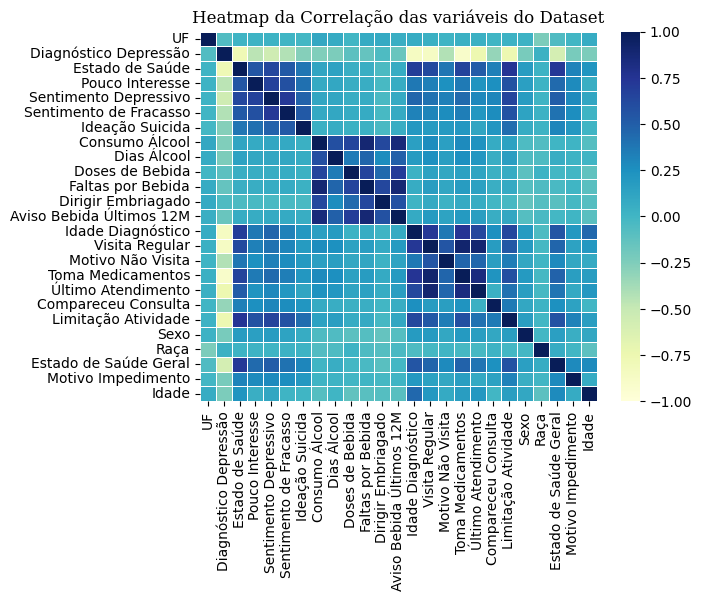

In [5]:
# Verificando como é a correlação das colunas do dataframe através de um heatmap
def Heatmap(df):

   fig, ax = plt.subplots()

   grafico = sns.heatmap(
      df.corr(),
      vmin=-1,
      vmax=+1,
      annot=False,
      cmap='YlGnBu',
      linewidths=0,
      ax=ax,
      linewidth=.5
   )

   grafico.set_title(
      "Heatmap da Correlação das variáveis do Dataset",
      fontsize = 12,
      fontname = "serif",
      horizontalalignment = 'center'
   )

Heatmap(df)


In [6]:
# Verificando a proporção de alcoolismo com diagnóstico de depressão e também somente depressão
filtro1 = df['Diagnóstico Depressão'] == 1.0
filtro2 = df['Consumo Álcool'] == 3.0
filtro3 = df['Doses de Bebida'] >= 8.0 
filtro4 = df['Aviso Bebida Últimos 12M'].isin([2.0, 3.0])
df_alcoolismo_e_depressao = df.loc[filtro1 & filtro2 & filtro3]
df_alcoolismo_e_depressao.shape

# Pegando apenas os que possuem diagnóstico de depressão
condicao = df['Diagnóstico Depressão'] == 1.0
df_so_depressao = df.loc[condicao]

(-1.0957670884439925,
 1.2083089271633312,
 -1.0991902014457793,
 1.1008094505874517)

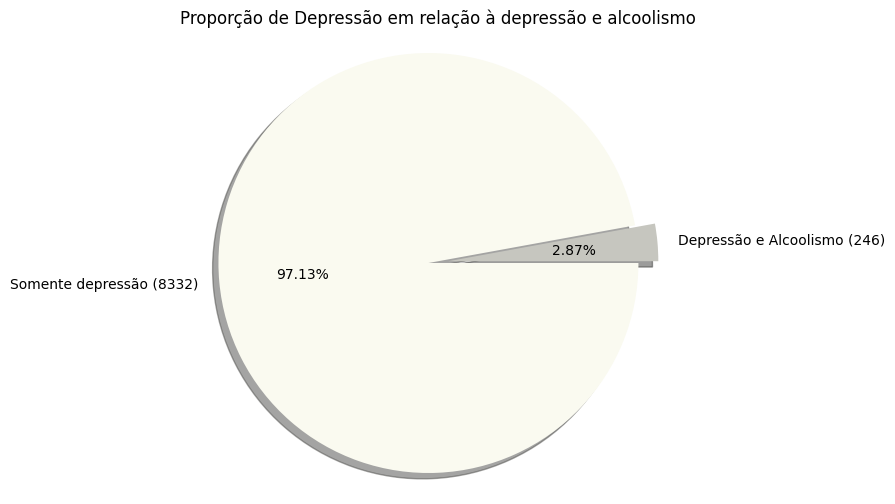

In [7]:
# Plotando um gráfico de pizza para analizar a proporção de Alcóolismo e depressão vs somente depressão

QtdeAD = len(df_alcoolismo_e_depressao)
QtdeD = len(df_so_depressao)

# Criar um rótulo para o gráfico de pizza
rotulo = [f'Depressão e Alcoolismo ({QtdeAD})', f'Somente depressão ({QtdeD})']

# Valores para o gráfico de pizza
valores = [QtdeAD, QtdeD]

# Cores para as fatias do gráfico
cores = ["#C6C6BF", "#FAFAF0"]

# Explodir a primeira fatia (Dados A)
explode = (0.104, -0.009)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=rotulo, colors=cores, explode=explode, autopct='%1.2f%%', shadow=True)
plt.title('Proporção de Depressão em relação à depressão e alcoolismo')
plt.axis('equal')  # Para garantir que o gráfico seja uma circunferência

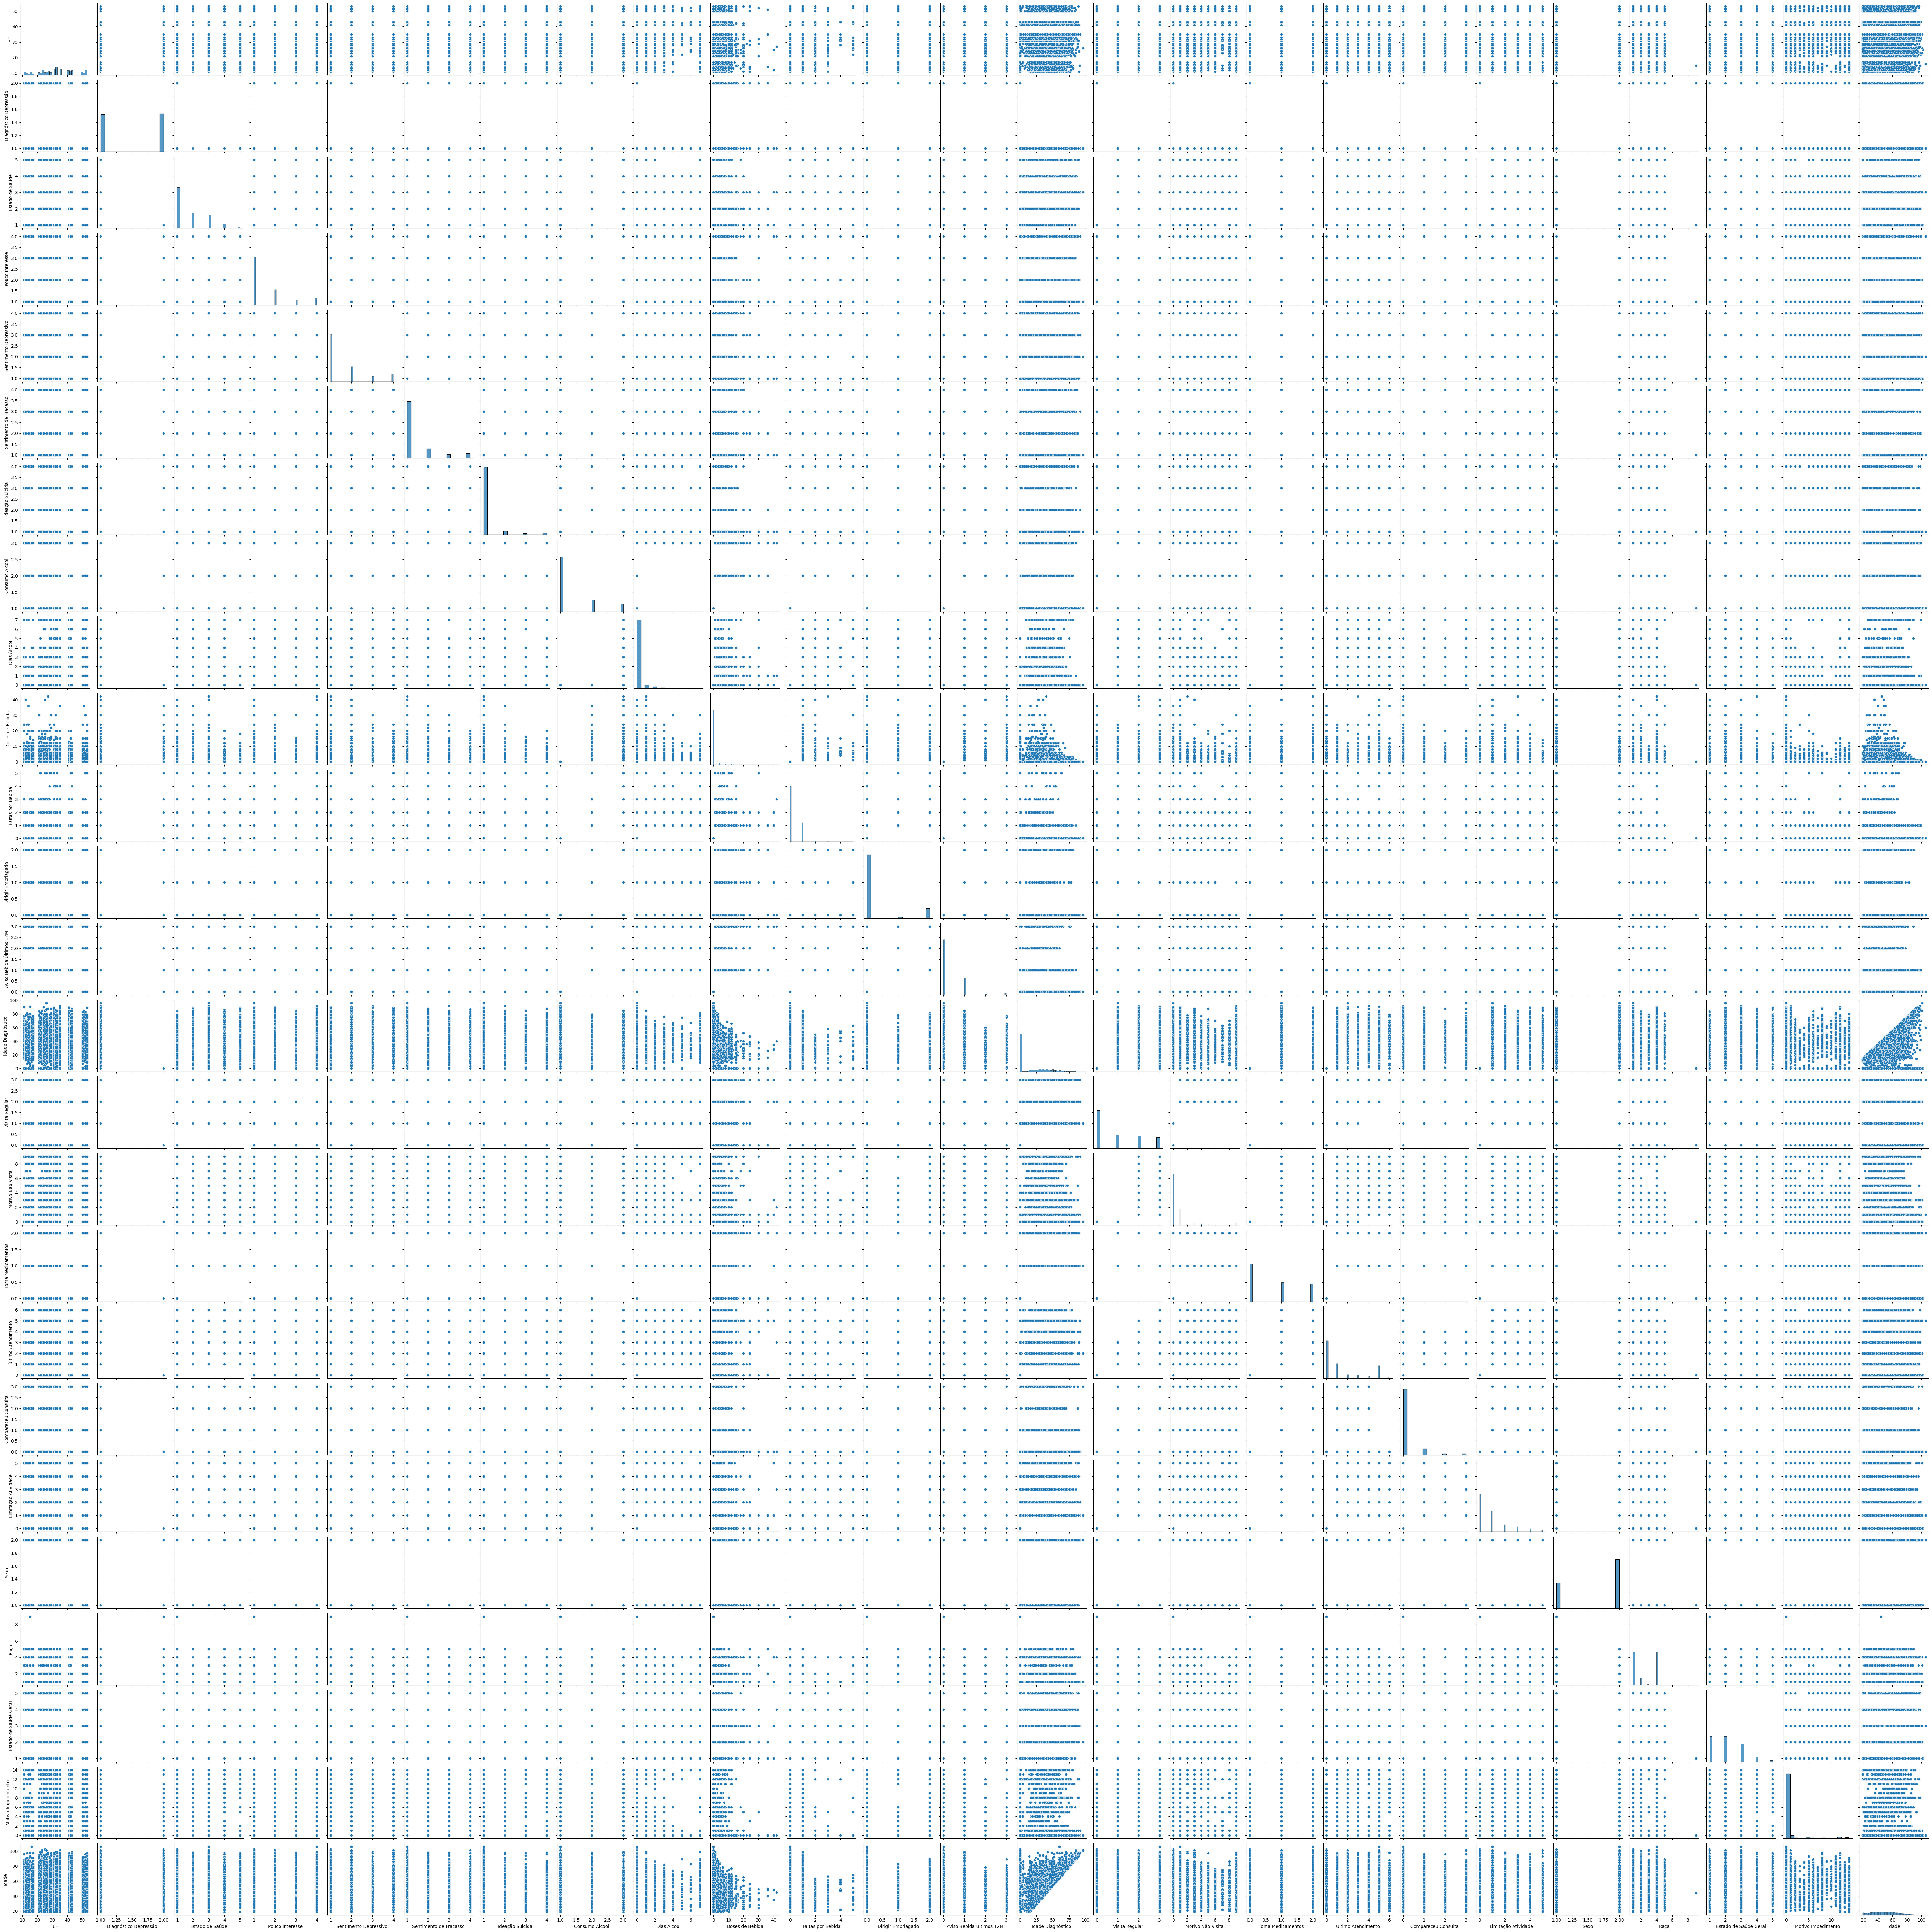

In [8]:
sns.pairplot(df)

In [9]:
# Todos os outliers da base
def Outlier(df):
   
   sns.boxplot(
      data = df,
      orient =  "h",
      showcaps = False,
      notch = True,
      flierprops = {"marker": "."},
      boxprops = {
         "facecolor": (.4, .6, .8, .5)
      },
      medianprops = {
         "color": "coral"
      }
   )

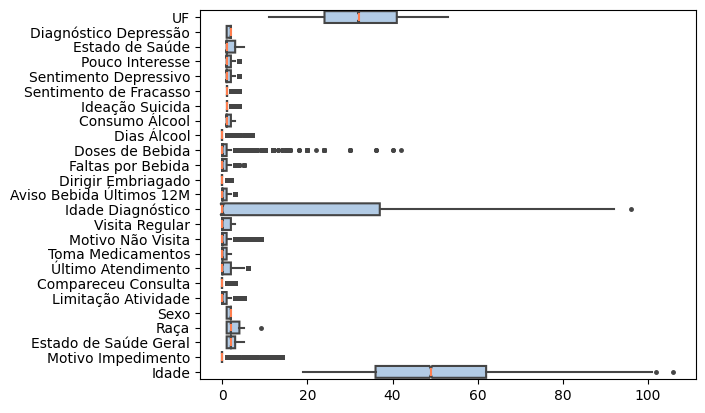

In [10]:
Outlier(df)